<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.1 Modelos deterministas de primer orden </h3>
<h3 style="text-align: center;"> Un poco de teoría </h3>

### Modelos de primer orden o ecuaciones diferenciales ordinarias

En este epígrafe, introducimos el modelo dinámico más simple. Interviene una variable que depende del tiempo $x(t)$, cuya evolución viene determinada por la siguiente ecuación diferencial: 

$$\displaystyle{\dot{x}} = \displaystyle{\frac{dx}{dt}} = f(t,x),$$

donde $f$ es una función de $\mathbb{R}^2$ y toma valores en $\mathbb{R}$. A estas ecuaciones se les llama ***ecuaciones diferenciales ordinarias***. A las soluciones de estas ecuaciones se les denomina ***órbitas o trayectorias***. 

Para más detalles sobre ecuaciones diferenciales ordinarias, pueden consultar la bibliografía siguiente: 

[Hirsh, M., Smale, S. and Devaney, R.L. (2013)](https://eclass.uoa.gr/modules/document/file.php/MATH626/Morris%20W.%20Hirsch%2C%20Stephen%20Smale%20and%20Robert%20L.%20Devaney%20%28Auth.%29%20-%20Differential%20Equations%2C%20Dynamical%20Systems%2C%20and%20an%20Introduction%20to%20Chaos-Academic%20Press%20%282012%29.pdf) "Differential equations, dynamical systems, and an introduction to chaos" Academic Press

[Lynch, S. (2018)](https://link.springer.com/book/10.1007/978-3-319-78145-7) "Dynamical Systems with Applications using Python" Birkhäuser.

[Spong, M.W. (2023)](https://www.perlego.com/book/3815108/introduction-to-modeling-and-simulation-a-systems-approach-pdf) "Introduction to Modeling and Simulation: A Systems Approach" Wiley.

[Zill, D.G. (2009)](https://cutbertblog.wordpress.com/wp-content/uploads/2019/01/zill-d.g.-ecuaciones-diferenciales-con-aplicaciones-de-modelado-cengage-learning-2009.pdf) "Ecuaciones diferenciales con aplicaciones de modelado" Cengage Learning.


### Solución de ecuaciones diferenciales en variables separadas

Si la función que define la ecuación diferencial se puede escribir de la siguiente forma $f(t,x)=g(t)h(x)$, entonces se dice que la ecuación está con ***variables separadas***. En ese caso, es posible encontrar la solución de la variable $x(t)$ integrando de la siguiente forma:

$$\begin{array}{lll}
   \displaystyle{\frac{dx}{dt}} & = & g(t)h(x) \\
   \displaystyle{\frac{1}{h(x)}\frac{dx}{dt}} & = & g(t)\\
   \displaystyle{\int{\frac{1}{h(x)}\frac{dx}{dt}dt}} & = & \displaystyle{\int g(t) dt},
   \end{array}
   $$
   
y haciendo un cambio de variable en el término de la izquierda, resulta,

$$ \displaystyle{\int{\frac{1}{h(x)}dx}}  =  \displaystyle{\int g(t) dt}. $$

Si es posible encontrar una solución analítica de ambas integrales, se resuelve la ecuación diferencial. 


### Modelos lineales de primer orden

Los modelos diferenciales lineales tienen la forma

$$\frac{dx}{dt} = a + bx, $$

donde $x(t)$ es la variable de estado, $a$ y $b$ son parámetros. Veamos la solución en tres casos: 

**a) {\bf Caso $b=0$}.** Es un modelo constante $\displaystyle{\frac{dx}{dt} = a} $. Basta entonces integrar la ecuación diferencial de la siguiente forma:

    $$\frac{dx}{dt} = a \longrightarrow dx=adt \longrightarrow \int_{x_0}^{x(t)} dx=\int_{t_0}^{t}adt,$$

siendo $t_0$ el instante inicial y $x_0=x(t_0)$ el estado del sistema en el instante inicial. La solucion de las integrales resulta: 

$$x(t)=x_0 + a(t-t_0).$$

Seguidamente se muestran las trayectorias que siguen estos modelos.    
    

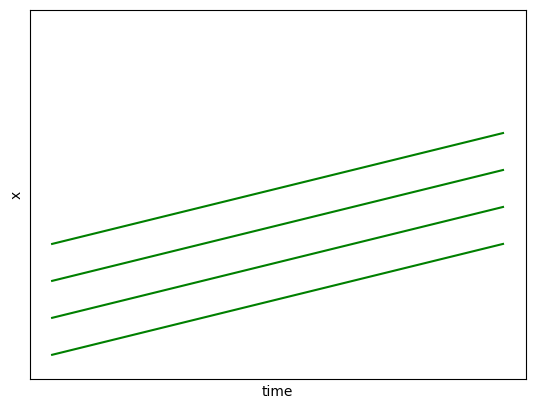

In [2]:
# LIBRERÍAS DE OPERACIONES
# ==============================================================================

import pandas as pd
import numpy as np

# LIBRERÍAS DE GRÁFICOS
# ==============================================================================
import matplotlib.pyplot as plt
#import seaborn as sn


# MODELO LINEAL DE CRECIMIENTO CONSTANTE
# ==============================================================================

"""" definición del modelo"""

def fsys(x,t,a,b):
    dxdt=a
    #dhdt=a*h-b*h*log(h) #rate of change of blood glucose 
    #dhdt=a*h-b*h**2
    #dhdt=a*h-b*h
    return np.array([dxdt])


"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=60
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
x0=np.array([4,10,16,22])
a = 0.3
b=0

def solveODE_euler(f, x0, t,  arg=()):
    n = len(t)
    x = np.zeros(n)
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x

x_sim=list()
for i in range(0,len(x0)):
    x_sim.append(solveODE_euler(fsys,x0[i],t,arg=(a,b)))
    
for i in range(0,len(x0)):
    plt.plot(x_sim[i],"g-",label='Simulation')
plt.xlabel("time")
plt.ylabel("x")
plt.xticks([], [])
plt.yticks([], [])
plt.ylim(0, 60)

plt.show()


**b) {\bf Caso $a=0$}.** Es un modelo de crecimiento poblacional $\displaystyle{\frac{dx}{dt} = bx} $. La ecuación diferencial se integra de la misma forma que la anterior:

    $$\frac{dx}{dt} = bx \longrightarrow dx=bxdt \longrightarrow \int_{x_0}^{x(t)} \frac{dx}{x}=\int_{t_0}^{t}bdt,$$

siendo de nuevo $t_0$ el instante inicial y $x_0=x(t_0)$ el estado del sistema en el instante inicial. Se resuelven las dos integrales a la izquierda y derecha, resultando:

    $$\ln(x(t))-\ln(x_0)=b(t-t_0).$$

Llevando $\ln(x_0)$ al miembro de la derecha y aplicando la exponencial en un lado y otro resulta: 

$$x(t)=x_0e^{b(t-t_0)}.$$


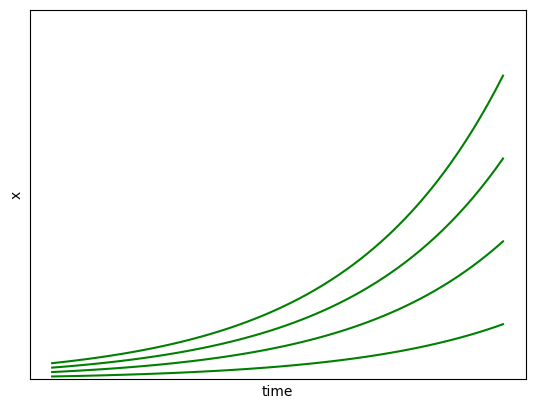

In [3]:
"""" definición del modelo"""

def fsys(x,t,a,b):
    dxdt=b*x
    #dhdt=a*h-b*h*log(h) #rate of change of blood glucose 
    #dhdt=a*h-b*h**2
    #dhdt=a*h-b*h
    return np.array([dxdt])


"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=60
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
x0=np.array([4,10,16,22])
a = 0.3
b=0.05

x_sim=list()
for i in range(0,len(x0)):
    x_sim.append(solveODE_euler(fsys,x0[i],t,arg=(a,b)))
    
for i in range(0,len(x0)):
    plt.plot(x_sim[i],"g-",label='Simulation')
plt.xlabel("time")
plt.ylabel("x")
plt.xticks([], [])
plt.yticks([], [])
plt.ylim(0, 500)

plt.show()



**c) Caso general $a\neq 0$, $b\neq 0$.** Primeramente se iguala la ecuación a cero para encontrar el estado de equilibrio: 

$$0 =a+ bx  \Longrightarrow x^*=-\frac{a}{b}. $$. 

Entonces la solución de la ecuación diferencial es la misma que el caso b) añadiendo el estado de equilibrio $x^*$. O sea, 

$$x(t)=c_0e^{b(t-t_0)} + x^*,$$

siendo $c_0$ una constante. Esta se determina a partir de la condición inicial $x(t_0)=x_0$. Sustituyendo $t_0$ en la ecuación de arriba, tenemos

$$x_0=c_0 + x^* \Longrightarrow  c_0= x_0-x^*.$$

Por tanto, la solución general es:  

$$x(t)=(x_0-x^*)e^{b(t-t_0)} + x^*.$$
    



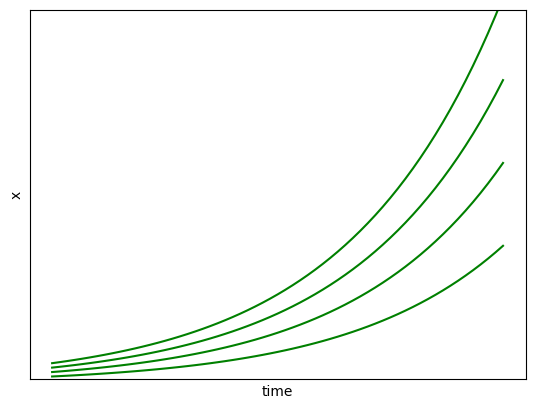

In [3]:
"""" definición del modelo"""

def fsys(x,t,a,b):
    dxdt=a+b*x
    #dhdt=a*h-b*h*log(h) #rate of change of blood glucose 
    #dhdt=a*h-b*h**2
    #dhdt=a*h-b*h
    return np.array([dxdt])


"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=60
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
x0=np.array([4,10,16,22])
a = 0.3
b=0.05

def solveODE_euler(f, x0, t,  arg=()):
    n = len(t)
    x = np.zeros(n)
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x

x_sim=list()
for i in range(0,len(x0)):
    x_sim.append(solveODE_euler(fsys,x0[i],t,arg=(a,b)))
    
for i in range(0,len(x0)):
    plt.plot(x_sim[i],"g-",label='Simulation')
plt.xlabel("time")
plt.ylabel("x")
plt.xticks([], [])
plt.yticks([], [])
plt.ylim(0, 500)

plt.show()

### Modelo logístico

Estos tienen la forma siguiente:

$$\frac{dx}{dt} = rx\left(1- \frac{x}{K}\right), $$

donde $r$ y $K$ son parámetros positivos. La solución es un poco más compleja que las anteriores. Para aproximarse a la solución asintótica, se buscan los estados de equilibrio del sistema, que es donde se anula la diferencial

$$0 =rx\left(1- \frac{x}{K}\right)  \Longrightarrow \left\{ \begin{array}{l}
         x^*=0, \\ x^{**} = K.
    \end{array} \right.$$ 

Por tanto, hay dos posibles estados asintóticos del modelo, la convergencia a cero o al punto de equilibrio $K$. La solución de la ecuación diferencial permitirá conocer cuál de ellas es la estable y cuál la inestable.\par
Como en los casos anteriores, es posible encontrar una solución cerrada a la ecuación logística. Siguiendo un procedimiento de integración similar a los anteriores llegamos a la solución final siguiente: 

$$x(t)=\frac{Kx_0e^{r(t-t_0)}}{x_0\left(e^{r(t-t_0)}-1\right) + K}.$$

Esta función tiene una gráfica sinusoidal con convergencia asintótica $K$. 

La apariencia gráfica de las distintas soluciones es la siguiente: 


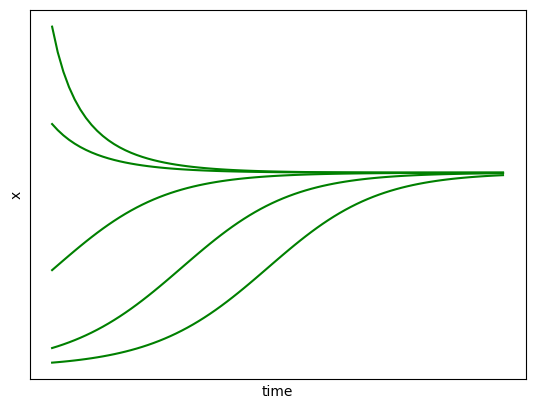

In [4]:
# MODELO DE CRECIMIENTO LOGÍSTICO
# ==============================================================================

"""" definición del modelo"""

def fsys(x,t,a,b):
    #dxdt=a+b*x
    #dhdt=a*h-b*h*log(h) #rate of change of blood glucose 
    dxdt=a*x-b*x**2
    #dhdt=a*h-b*h
    return np.array([dxdt])


"""" definición del intervalo de tiempo"""

timestep = 1 
t0=0
tf=80
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))

"""" valores iniciales de las variables de estado y parámetros"""
x0=np.array([0.5,2,10,25,35])
a = 0.1
b=0.005

x_sim=list()
for i in range(0,len(x0)):
    x_sim.append(solveODE_euler(fsys,x0[i],t,arg=(a,b)))
    
for i in range(0,len(x0)):
    plt.plot(x_sim[i],"g-",label='Simulation')
plt.xlabel("time")
plt.ylabel("x")
plt.xticks([], [])
plt.yticks([], [])
#plt.ylim(0, 30)

plt.show()



Existe una forma visual de conocer la dinámica general. La grafica siguiente representa la trayectoria de la función $f(x,t)$ en el plano $(x,dx/dt)$. 

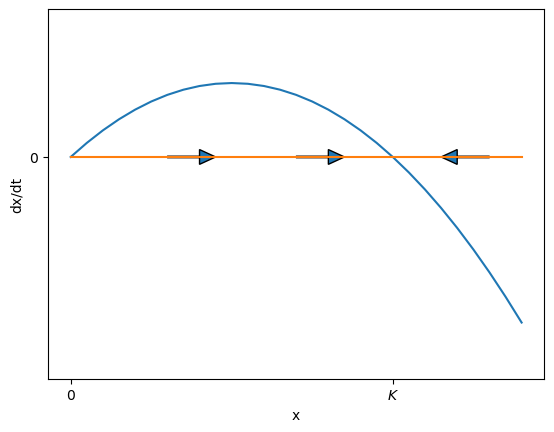

In [6]:
x_array=np.linspace(0,28,29)
fsys_array=fsys(x_array,1,a,b)[0]
cero_line=[0]*len(x_array)

plt.plot(x_array,fsys_array,label='Growth')
plt.plot(x_array,cero_line)
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.xticks([0,20], [0,r'$K$'])
plt.yticks([0], [0])
plt.ylim(-1.5, 1)
plt.arrow(14, 0, 2, 0, 
          head_width = 0.1,
          head_length = 1,
          width = 0.01,
          ec ='black')
plt.arrow(6, 0, 2, 0, 
          head_width = 0.1,
          head_length = 1,
          width = 0.01,
          ec ='black')
plt.arrow(26, 0, -2, 0, 
          head_width = 0.1,
          head_length = 1,
          width = 0.01,
          ec ='black')

plt.show()


Como puede observarse, si el punto inicial $x_0$ se encuentra entre lo puntos de equilibrio $x^*=0$ y $x^{**}=K$, o sea, $0<x_0<K$, entonces la función $f(x,t)$ es positiva y la variable aleatoria crece en el tiempo, como está indicado por las flechas representadas en el eje $x$. En cambio, si el punto inicial cumple $x_0>K$, entonces la variable aleatoria decrece en el tiempo, ya que $f(t,x)$ es negativa en este intervalo. Por tanto, todas las trayectorias con puntos iniciales no negativos convergen al punto de equilibrio $K$. Se dice que este punto es un **sumidero o punto de equilibrio asintóticamente estable**.

Por el contrario, las trayectorias que se encuentran cercanas al punto de equilbrio $x^*=0$ se alejan de él a lo largo del tiempo. En este caso, se dice que este punto es una **fuente o punto de equilibrio inestable**. 